In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
spot_init=100
int_rate=2/100
volatility=15/100
maturity=1
nb_step=12
time_step= maturity/nb_step
nb_path=20f

nb_seed=20191008

In [3]:
drift_mod= (int_rate-0.5*volatility**2)*time_step
mat_drift= drift_mod*np.cumsum(np.ones((nb_path,nb_step)),axis=1)
volat_mod= volatility*np.sqrt(time_step)
np.random.seed(nb_seed)
mat_shock= np.random.standard_normal((nb_path,nb_step))
mat_shock_cum= np.cumsum(mat_shock,axis=1)
mat_volatility= volat_mod*mat_shock_cum
mat_log_spot= mat_drift+mat_volatility
mat_spot_init= spot_init*np.ones((nb_path,nb_step))
mat_spot_fut= mat_spot_init*np.exp(mat_log_spot)
vec_spot_init= spot_init*np.ones((nb_path,1))
mat_path_spot_fut= np.concatenate((vec_spot_init,np.round(mat_spot_fut,3)),axis=1)

In [4]:
mat_volatility

array([[-3.92910799e-02, -5.48157371e-02, -7.50614585e-02,
        -6.12270133e-02, -1.57732731e-03, -1.66171539e-02,
         5.00588610e-02,  1.33090385e-01,  1.56536348e-01,
         7.65473844e-02,  5.74231685e-02,  1.79151886e-03],
       [ 1.82234231e-03, -1.30927062e-02, -3.86594593e-02,
        -1.33741149e-01, -1.30667140e-01, -2.25105083e-01,
        -2.33041364e-01, -3.22422568e-01, -3.57208148e-01,
        -3.48475738e-01, -3.84047445e-01, -3.32611895e-01],
       [-7.35450236e-02, -7.18789057e-02, -2.00105501e-02,
        -3.90794091e-02, -1.07101381e-01, -3.89220421e-02,
        -1.03787900e-02,  3.03016966e-02,  7.92186333e-02,
         1.34546095e-01,  1.88908754e-01,  1.81571837e-01],
       [ 3.20065446e-02,  4.37835288e-02,  2.75363735e-02,
         3.74405621e-02,  3.89906163e-02, -2.19773146e-02,
        -1.29939111e-02, -2.92471340e-02, -1.03338056e-01,
        -1.36609303e-01, -8.74922862e-02, -2.18595149e-02],
       [-3.02441963e-02, -1.35861324e-01, -1.6340193

In [4]:
np.shape(mat_path_spot_fut)

(20, 13)

In [5]:
def comp_price_call(spot,strike,tt_maturity,int_rate,volatility):
    discount= np.exp(-int_rate*tt_maturity)
    volat_mod= volatility*np.sqrt(tt_maturity)
    moneyness= np.log(spot/strike)
    term_vol= (int_rate+0.5*volatility**2)*tt_maturity
    d1=(moneyness+term_vol)/volat_mod
    d2=d1-volat_mod
    prob_d1=norm.cdf(d1)
    prob_d2=norm.cdf(d2)
    price_call= spot*prob_d1-discount*strike*prob_d2
    return(price_call)
def comp_delta_call(spot,strike,tt_maturity,int_rate,volatility):
    volat_mod= volatility*np.sqrt(tt_maturity)
    moneyness= np.log(spot/strike)
    term_vol= (int_rate+0.5*volatility**2)*tt_maturity
    d1=(moneyness+term_vol)/volat_mod
    prob_d1=norm.cdf(d1)
    delta_call_BS=prob_d1
    return(delta_call_BS)

## Question 1 & 3

In [6]:
mat_call_price = comp_price_call(mat_spot_fut,100,maturity,int_rate,volatility)
mat_call_delta = comp_delta_call(mat_spot_fut,100,maturity,int_rate,volatility)

In [7]:
for i in range(nb_path):
    for j in range(nb_step):
        mat_call_price[i,j] = round(mat_call_price[i,j],2)
        mat_call_delta[i,j] = round(mat_call_delta[i,j],3)

In [8]:
np.shape(mat_call_price)

(20, 12)

In [9]:
mat_call_delta;

## Question 2

In [25]:
pnl_non_covered = np.zeros(nb_path)
nb_calls = 10000
for i in range(nb_path):
    borrowing_init = nb_calls*mat_call_price[i,0]*(1-0.2/100)
    borrowing = 0
    for j in range(1,nb_step):
        borrowing += nb_calls*(mat_call_price[i,j-1]-mat_call_price[i,j]) + int_rate*borrowing_init
        borrowing_init = borrowing
    pnl_non_covered[i] =  round(nb_calls*(mat_call_price[i,0] - mat_call_price[i,nb_step-1]) + int_rate*borrowing,2)

In [26]:
pnl_non_covered

array([ -27109.73,   71771.09, -204225.43,   28814.22,   30809.25,
         32992.44, -138226.86,   12334.46,   12627.18,   -7389.79,
         37742.99,   50529.56,   52887.04,   57817.8 ,   62476.24,
       -156401.39, -114023.8 ,   19669.31,    9216.87, -213722.36])

## Question 4

In [12]:
stocks_to_hold = np.zeros((nb_path,nb_step))

for i in range(nb_path):
    for j in range(nb_step):
        '''if j == 0:
            stocks_to_hold[i,j] = mat_call_price[i,j]/(mat_call_delta[i,j]*mat_spot_fut[i,j])
        else:
            stocks_to_hold[i,j] = round((mat_call_price[i,j] - mat_call_price[i,j-1])/(mat_call_delta[i,j]*(mat_spot_fut[i,j]-mat_spot_fut[i,j-1])))'''
        stocks_to_hold[i,j] = round(nb_calls*mat_call_delta[i,j])

In [13]:
stocks_to_hold

array([[4810., 4410., 3910., 4280., 5880., 5500., 7180., 8720., 9020.,
        7790., 7400., 6100.],
       [5890., 5520., 4860., 2530., 2620., 1030.,  950.,  290.,  170.,
         190.,  110.,  260.],
       [3910., 3970., 5360., 4870., 3150., 4910., 5690., 6730., 7820.,
        8760., 9360., 9300.],
       [6650., 6950., 6580., 6830., 6890., 5360., 5620., 5210., 3310.,
        2570., 3740., 5480.],
       [5050., 2460., 1930., 1760., 2050.,  990., 1940., 1370., 1910.,
        2000., 1830., 3010.],
       [6120., 5840., 4430., 4230., 2270., 2680., 2380., 2160., 2040.,
        2140., 2720., 4500.],
       [5510., 5520., 4480., 4800., 4470., 6830., 7140., 8650., 8190.,
        7500., 8170., 8940.],
       [6400., 6140., 6780., 7210., 6490., 6150., 4160., 4910., 5980.,
        5330., 4210., 5910.],
       [4140., 4950., 4720., 4010., 3640., 6440., 6240., 4630., 3030.,
        3550., 4430., 3230.],
       [5310., 7270., 7890., 7150., 8590., 9190., 8890., 7850., 8170.,
        7630., 7490.

In [30]:
print(mat_call_price[0,0])

4.95


## Question 5

In [36]:
pnl_covered = np.zeros(nb_path)
nb_calls = 10000
for i in range(nb_path):
    borrowing_init = nb_calls*mat_call_price[i,0]*(1-0.2/100) - (stocks_to_hold[i,0]*mat_spot_fut[i,0]*(1+0.5/100))
    borrowing = 0
    for j in range(1,nb_step):
        borrowing_bar = nb_calls*(mat_call_price[i,j-1]-mat_call_price[i,j]) + stocks_to_hold[i,j-1]*(mat_spot_fut[i,j] - mat_spot_fut[i,j-1])+ int_rate*borrowing_init
        borrowing += borrowing_bar + (stocks_to_hold[i,j]-stocks_to_hold[i,j-1])*mat_spot_fut[i,j]*(1-0.5/100)
    pnl_covered[i] =  round(nb_calls*(mat_call_price[i,0] - mat_call_price[i,nb_step-1]) + int_rate*borrowing,2)

Text(0.5, 1.0, 'Covered and non covered strategies pnl')

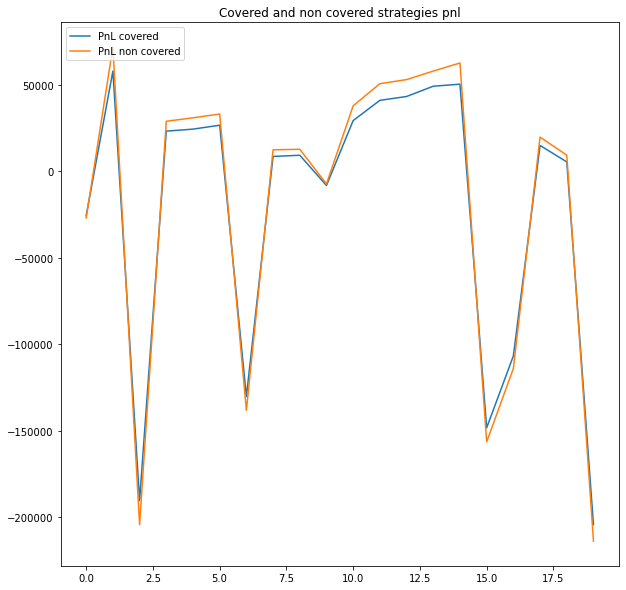

In [55]:
plt.figure(figsize=(10,10))
ax1 = plt.plot(pnl_covered,label="PnL covered")
ax2 = plt.plot(pnl_non_covered,label="PnL non covered")
plt.legend(loc="upper left")
plt.title("Covered and non covered strategies pnl")